> ### EEE2020: Data Structures & Algorithms

# Assignment \# IV: Searching & Sorting

<div style="text-align: right"> **Due date: May 21, 2021.** </div> 
<div style="text-align: right"> **Please upload your data @ LearnUs by 7 PM.** </div> 
<br>
<div style="text-align: right"> Daesung Jeon(전대성): <a href="mailto:ds.jeon@yonsei.ac.kr">ds.jeon@yonsei.ac.kr</a> 
<div style="text-align: right"> Hyekang Park(박혜강): <a href="mailto:hyekang.park@yonsei.ac.kr">hyekang.park@yonsei.ac.kr</a> </div>
</div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and Engligh for your report.
3. **Analyze the algorithm theoretically and empirically, and write discussion.** 
4. **Report your results.**  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2017142001] [송명근]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

-------------------------------

### PROBLEM I - Sorting (20 POINTS)

#### 1. Sorting 함수들을 구현하려 한다. 다음 조건들을 만족하는 ```bubble sort```, ```merge sort```, ```insertion_sort```, ```shell sort```,  ```quick sort```를 구현하시오. (5점)
> * ```sort_list``` 와 ```func```를 인자로 받는다. ```sort_list```는 실수를 원소로 하는 정렬 되지 않은 리스트이고, ```func```는 실수 값을 입력 받아 또 다른 실수 값을 반환하는 함수이다.
> * 정렬된 ```sort_list```를 반환한다.
> * ```func```가 반환하는 값을 기준으로 내림차순 정렬한다.
>> * ```func```의 예시 : ```lambda x : x + 1```



#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [3]:
### CODE HERE ###
def bubble_sort(sort_list, func):
    for num in range(len(sort_list)):
        for i in range(len(sort_list)-num-1):
            if func(sort_list[i]) > func(sort_list[i+1]): # if function value is bigger we swap
                sort_list[i], sort_list[i+1] = sort_list[i+1], sort_list[i]
def merge_sort(sort_list, func):
    if len(sort_list) > 1: # split until every component is solo
        mid = len(sort_list)//2
        left = sort_list[:mid]
        right = sort_list[mid:]
        merge_sort(left, func) # recursion
        merge_sort(right, func)
        i = 0
        j = 0
        k = 0
        while i < len(left) and j < len(right): # merge by comparing from the start of each right and left function value
            if func(left[i]) < func(right[j]):
                sort_list[k] = left[i]
                i += 1
            else:
                sort_list[k] = right[j]
                j += 1
            k += 1
        while i < len(left): # if right is done put all remaining left
            sort_list[k] = left[i]
            i += 1
            k += 1
        while j < len(right): # if left is done put all remaining right
            sort_list[k] = right[j]
            j += 1
            k += 1
def insertion_sort(sort_list, func):
    for i in range(len(sort_list)-1): # until we get to the end
        temp = sort_list[i+1]
        position = i 
        while position >= 0 and func(sort_list[position]) > func(temp): # we compare until find the right place
            sort_list[position+1] = sort_list[position]
            position -= 1
        sort_list[position+1] = temp
def gap_insertion_sort(sort_list, start, gap, func): # for shell sort
    for i in range(start + gap, len(a_list), gap):
        temp = sort_list[i]
        position = i
        while position >= gap and func(sort_list[position - gap]) > func(temp): # difference with normal insertion sort
            sort_list[position] = sort_list[position - gap]
            position -= gap
        sort_list[position] = temp
def shell_sort(sort_list, func):
    sublist_count = len(sort_list) // 2 # until all component sorted
    while sublist_count > 0:
        for start_position in range(sublist_count):
            gap_insertion_sort(sort_list, start_position, sublist_count, func) # use gap insertion sort
        sublist_count = sublist_count // 2
def _quick_sort_helper(sort_list, first, last, func):
    if first < last:
        split_point = _partition(sort_list, first, last, func) # pivot value기준으로 나눈 뒤 right 반환
        _quick_sort_helper(sort_list, first, split_point - 1, func) # quick sort left of pivot
        _quick_sort_helper(sort_list, split_point + 1, last, func) # quick sort right of pivot
def _partition(sort_list, first, last, func):
    pivot_value = sort_list[first] # make the first value the pivot value
    left = first + 1
    right = last
    done = False
    while not done: # find the pivot value's position
        while left <= right and func(sort_list[left]) <= func(pivot_value):
            left += 1
        while right >= left and func(sort_list[right]) >= func(pivot_value):
            right -= 1
        if right < left: # all components probed
            done = True # finish
        else: # make the smaller value to the left bigger value to the right
            sort_list[left], sort_list[right] = sort_list[right], sort_list[left]
    sort_list[first], sort_list[right] = sort_list[right], sort_list[first]
    return right
        
def quick_sort(sort_list, func):
    _quick_sort_helper(sort_list, 0 , len(sort_list) - 1, func)
################
a_list = [54, 26, 93, 17, 77, 31, -44, 55, 20]
quick_sort(a_list, lambda x : x + 1)
print(a_list)

[-44, 17, 20, 26, 31, 54, 55, 77, 93]


### Describe and Discuss your answer

bubble sort는 probing 하면서 현재 위치의 함수값이 다음 위치의 함수값보다 크다면 바꿔주는 것을 반복하였다. 이 때 할 때마다 제일 큰 값이 뒤로 가므로 probing하는 자료를 뒤에서 하나씩 빼주었다.
merge sort는 모든 요소를 한개로 쪼개준 뒤 right와 left를 합쳐주는 방식을 사용하였다. 이 때 right 와 left는 모두 sorting이 완료된 상태이므로 right의 남아 있는 요소 중 가장 작은 요소와 left의 남은 요소 중 가장 작은요소를 비교하는 방식을 사용하였다.
insertion sort는 요소를 한개씩 늘려가면서 sorting하는데 그 추가된 요소의 위치를 찾아주는 방식을 사용하였다.
shell sort는 insertion sort를 진행 하나 이 때 gap을 주어 insertion sort를 할 때 이미 대략적 sorting이 진행된 상태이기에 그 위치가 대략적으로 맞을 가능성이 높아 조금 더 빠르게 자기 위치를 찾아갈 수 있도록 하였다.
quick sort는 가장 앞에있는요소 즉 무작위 요소값을 축으로 삼아 그 요소를 기준으로 함수값이 작은 값들과 큰 값들로 분류해준다. 이걸 1개의 단위 요소가 남을 때까지 작은값들 즉 왼쪽에 있는 요소들과 오른쪽에 있는 값들에게 똑같이 진행해준다. quick sort helper가 이 recursion이 일어나도록 하게 하는 함수이고 partition 함수가 실제로 sorting 즉 분류를 담당하는 함수이다.

___

#### 2. Sorting 함수들의 complexity를 비교하려 한다. 다음 조건을 만족하는 ```compute_sorting_time()``` 함수를 구현하시오. (5점)
> * $N = 100, 200, ... , 1000$일 때 각 정렬함수의 수행 시간 그래프를 `matplotlib`을 이용하여 line plot으로 나타낼 것.
> * x축을 $N$, y축을 정렬 시간으로 할 것. 
> * ```_compute_time(func)``` 함수는 정렬 함수를 입력으로 받아 $N = 100, 200, ... , 1000$ 일때의 수행시간 list를 반환한다.

#### HINT
1. ```random.sample``` 함수를 이용하여 임의의 수열을 생성한다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 각 정렬함수의 complexity를 설명한다.

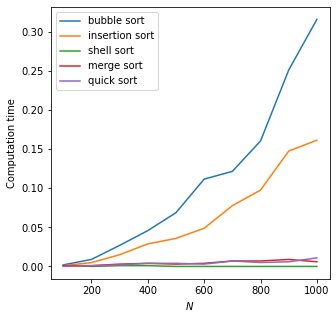

In [4]:
def _compute_time(func):
    import time
    import random
    ### CODE HERE ###
    time_list = []
    for n in range(100, 1001, 100): # 100 단위로
        sample_list = random.sample([num for num in range(n)], n)
        start = time.time()
        func(sample_list, lambda x : x + 1) # 함수실행에 걸리는 시간 측정
        time_list.append(time.time() - start)
    #################
    return time_list

def compute_sorting_time():
    import matplotlib.pyplot as plt
    ### CODE HERE ###
    # 각 요소의 개수마다 실행시간을 담은 리스트 추출
    bubble_time = _compute_time(bubble_sort)
    insertion_time = _compute_time(insertion_sort)
    shell_time = _compute_time(shell_sort)
    merge_time = _compute_time(merge_sort)
    quick_time = _compute_time(quick_sort)
    
    x_axis = [n for n in range(100, 1001, 100)] # plot
    plt.figure(figsize=(5, 5))
    plt.plot(x_axis, bubble_time)
    plt.plot(x_axis, insertion_time)
    plt.plot(x_axis, shell_time)
    plt.plot(x_axis, merge_time)
    plt.plot(x_axis, quick_time)

    plt.xlabel('$N$', fontsize=10)
    plt.ylabel('Computation time', fontsize=10)
    plt.legend(['bubble sort', 'insertion sort', 'shell sort', 'merge sort', 'quick sort'], loc='best', fontsize=10)    
    #################

compute_sorting_time()

### Describe and Discuss your answer

먼저 bubble sort는 비교를 n-1번 + n-2번 + ... 즉 (n-1)n/2 만큼의 비교를 실행한다. 바꿔주는 행위는 이보다 작거나 같으므로 O(n^2)으로 볼 수 있다. 
insertion sort는 worst case에서 끝까지 모두 비교를 한다고 했을 때 bubble sort와 같이 (n-1)n/2 이다. 그러나 그 위치 까지 가기전에 비교가 끝날 수도 있고 best case의 경우 하나의 요소에 대해 한번만 비교를 해도되는 경우가 생길 수 도 있다. (그 요소가 제일 클 때) 그래서 그래프에서 같은 이차함수라도 bubble sort보다 시간이 적게 걸리는 것을 확인할 수 있다.
shell sort는 n과 n^2의 사이의 big-O notation을 가진다고 알려져 있다. 정확히는 n^(3/2) 이다 즉 insertion sort의 comparison을 하는 회수를 줄이기 위해 큰 범위의 sorting을 해주는 것 만으로 엄청난 효과를 볼 수 있는 것을 알 수 있다.
merge sort는 split 해주는 과정은 총 log n번으로 볼 수 있고(밑이 2) 다시 합치는 과정에서 n번의 operation이 일어나는 것을 확인할 수 있다. 결과적으로 big O notation은 이를 곱한 O(nlogn)으로 볼 수 있다.
quick sort 또한 이상적인 경우를 생각했을 때 split하는 과정에서 log n 번을 나눠주는 것을 알 수 있다. 또한 분류를 하는 과정에서 n 개의 item을 비교하므로 big O notation은 이를 곱한 O(nlogn)으로 볼 수 있다. 하지만 이상적이지 않은 상황에서 나눠지는 횟수가 log n보다 커질 수 있다. 최악의 경우 n번까지 되므로 같은 big O notation임에도 불구하고 그래프에서 merge sort 보다 살짝 올라와 있는 것을 확인할 수 있다.

___

#### 3. 2018 평창 동계 올림픽 순위를 구하려고 한다. 다음 조건들을 만족하는 ```sort_medals()``` 함수를 구현하시오. (10점)
> * ```medals.csv``` 파일로 부터 데이터를 받아, **금메달 우선 순위 방식으로 정렬**한 뒤 **pandas.DataFrame**의 형태로 반환한다.
> * **Problem I-1**에서 구현한 ```quick_sort()```함수를 1번만 사용하여 정렬한다. 

#### HINT
1. extreme case에 대해서는 가정하지 않는다. (e.g. 금메달 1개 은메달 0개 vs 금메달 0개, 은메달 1000000개) 
2. ```pd.read_csv('./medals.csv').values.tolist()``` 를 이용하여 csv 파일을 읽고 리스트로 변환한다.
3. **pandas.DataFrame**에 관한 내용은 다음 [링크](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)를 참조한다.


#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- numpy는 리스트를 numpy array로 바꾸는 것 이외에 사용하지 않는다.
- pandas는 파일을 읽고 리스트로 바꿀 때, 정렬된 리스트를 **pandas.DataFrame**의 형태로 바꿀 때 이외에 사용하지 않는다.
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [5]:
def sort_medals(): # 12
    import pandas as pd
    import numpy as np
    values = pd.read_csv('./medals.csv').values.tolist()
    ### CODE HERE ###
    quick_sort(values, lambda x : -(x[1] * 1000000 + x[2] * 1000 + x[3])) # 한 메달을 1000개이상 따지 않는다고 가정
    df = pd.DataFrame(np.array(values), columns=['국가', '금메달', '은메달', '동메달'])
    return df
    #################

sort_medals()

,국가,금메달,은메달,동메달
0,노르웨이,14,14,11
1,독일,14,10,7
2,캐나다,11,8,10
3,미국,9,8,6
4,네덜란드,8,6,6
5,스웨덴,7,6,1
6,대한민국,5,8,4
7,스위스,5,6,4
8,프랑스,5,4,6
9,오스트리아,5,3,6


### Describe and Discuss your answer

한 나라가 극단적으로 메달하나를 1000개 이상 따지 않는다고 가정하고 func을 넣어주었다. 금메달의 가치가 가장 크므로 1000 * 1000을 곱해주었고 은메달에는 1000을 곱해주었다. 가치의 합이 가장 큰 사람부터 배열해야 하므로 -를 곱해주었다. 위와 같이 금메달, 은메달 동메달 순으로 잘 배열된 것을 확인할 수 있다.

___

### PROBLEM II - Sorting & Unoredered List (30 POINTS)

#### Node로 이루어진 Unordered list를 merge sort 방식으로 정렬하려 한다. 주어진 ```File```와 ```Node``` class를 이용하여 다음 조건들을 만족하는 ```UnorderedList``` class를 완성하시오. (30점)
* ```File``` class는 이름과 생성 날짜를 instance variable로 가진다. 
* ```Node``` class는 ```self.data``` 와 ```self.next```를 instance variable로 가진다. ```self.data```에는 ```File``` class의 인스턴스를 저장하고 ```self.next```에는 다른 노드를 저장한다.
* ```UnorderedList``` class는 ```self.head``` 와 ```self.metric```을 instance variable로 가진다. ```self.head```는 연결된 노드들 중 제일 앞의 노드를 저장한다. ```self.metric```은 ```merge_sort(self, metric)``` method에서 인자로 받아 어떤 metric을 사용할지 저장한다. ```__init(self)__```, ```append(self, item)```, ```merge_sort(self, metric)```, ```__repr(self)__```은 미리 구현되어 있으며 merge sort를 수행하는 부분은 다음과 같다.
> * ```merge_sort(self, metric)``` : ```metric``` 은 ```File```의 **이름** 또는 **생성 날짜**가 될 수 있다. 해당 ```metric```에 대하여 오름 차순으로 ```merge_sort_helper```를 이용하여 merge sort를 수행한다. 
> * ```merge_sort_helper(self, new_head)``` : 최초로 ```self.head```를 입력으로 받아 recursive하게 merge sort를 수행한 뒤 정렬된 ```UnorderedList```의 ```new_head```를 반환한다. 
> * ```get_middle(self, new_head)``` : ```UnorderedList``` 안에서 부분 혹은 전체의 link된 노드들의 head를 입력으로 받아 중간 노드를 반환한다. 
* 정렬할 때 노드를 제외한 다른 데이터 구조를 사용할 수 없다(e.g. list, dictionary).
* 정렬하는 동안 ```Node``` 클래스의 인스턴스 생성이나 deepcopy는 할 수 없다. 


#### HINT
1. ```UnorderedList```의 정렬이 되지 않은 linked node들을 다 분리(Divide)한 뒤 합져주는 과정에서 정렬(Conquer & Combine)한다.
2. **Divide -> Conquer & Combine**의 과정 중 **Conquer & Combine**을 recursive function을 사용하여 구현할 수 있다(권장). 만약 사용할 경우 다른 method를 ```###CODE HERE###``` 이외에 작성할 수 있다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외에 다른 하나의 method를 구현할 수 있다. 그러나 미리 작성된 코드를 수정할 수 없다.
- 작성한 코드들 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.



In [6]:
from assignment4 import File, UnorderedList

In [7]:
import random
import string
import time
sort_list = UnorderedList()
str_list = string.ascii_uppercase

for i in range(10):
    random_name = ''.join(random.choices(str_list, k=1)) + str(random.randint(1,20))
    sort_list.append(File(random_name))
    time.sleep(0.1)
    
    
print(sort_list)
sort_list.merge_sort('name')
print(sort_list)
sort_list.merge_sort('date')
print(sort_list)

[I8, I5, K6, L6, V4, S5, C2, P19, K6, F6]
[C2, F6, I5, I8, K6, K6, L6, P19, S5, V4]
[I8, I5, K6, L6, V4, S5, C2, P19, K6, F6]


### Describe and Discuss your answer

먼저 merge_sort_helper에서 merge sort의 알고리즘을 이용하였다. left와 right의 노드가 하나씩 남을 때 까지 left와 right노드를 분리해준 뒤 두 노드에서 merging을 실행하였다. 이 때 헤드를 먼저 결정 해준 뒤 진행하였다. 또한 이 과정에서 metric이 이름인지 날짜인지에 따라 데이터의 종류를 각각 이름과 날짜로 비교를 하였다. python 에서는 이름은 사전순 날짜는 빠른 순서가 작다 (Class). get middle에서는 오른쪽 노드의 헤드를 결정하면서 동시에 왼쪽과 오른쪽을 분리시켜 주었다. 마지막으로 구현의 편의성을 위해 get_length 메소드를 추가하여 노드의 길이를 쉽게 가져올 수 있었다. 이렇게 구현된 merge_sort를 date와 name을 넣어 해보았다. 이 때 date의 경우 파일이 등록되는 시간이 너무 빨라 모두 같은 시간에 등록되어 sorting이 되지 않는 것을 피하기 위해 time모듈의 sleep함수를 사용하여 0.1초를 쉬게 해주었다. 먼저 시간순서대로 나온 파일을 사전순으로 배열한 뒤 다시 시간순서대로 잘 sorting되는 것을 확인할 수 있다.

___

### PROBLEM III - Searching (50 POINTS)

#### 1. Collision resolution을 위해 chaining을 사용하는 HashTable을 구현하려 한다. 다음 조건들을 만족하는 HashTable를 구현하시오 (15점)
* **Chaining**이란 주어진 key 값에 대응하는 hash address가 고정되는 close addressing 방법 중의 하나이다. Collision이 발생한 key들을 리스트를 이용해 저장하고 각 리스트를 chain이라 부른다. Chain 길이의 평균은 Load factor(요소의 수/Table의 크기)와 같다. Chaining을 이용한 collision resolution을 수행하는데 고려해야 할 점은 다음과 같다.
> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```Empty list``` 로 초기화된 리스트를 사용한다.
> * ```put``` 할 때 요소의 수가 ```self.size```와 같으면(load factor = 1) HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
 
* 구현해야 할 Methods들은 다음과 같다.
> * ```__init__(self, size) ``` : Empty HashTable을 생성한다.
>> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```Empty list``` 로 초기화된 리스트를 사용한다.
>> * ```self.num_collision```은 collision이 발생할 때마다 값을 증가시켜준다.
>> * 현재 요소의 수는 ```self.num_element```에 저장한다
> * ```hash_func(self, key) ``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```_resize(self)``` : HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```put(self, key, data) ``` : key, data 쌍을 받아 key의 hash value를 계산한 뒤 해당 값을 index로 ```self.slots```, ```self.data```의 list에 저장한다. 요소의 수가 ```self.size```와 같으면(load factor = 1) resizing한다.
> * ```get(self, key) ``` : 입력받은 key에 대응하는 data를 반환한다. 없을 경우 에러 메시지를 출력한다.
> * ```remove(self, key) ``` : 입력받은 key에 대응하는 key, data 쌍을 삭제한다. 없을 경우 에러 메시지를 출력한다.
> * ```__getitem__(self, key) ``` : HashTable에 []연산자를 통해 접근할 수 있도록 한다. 
> * ```__setitem__(self, key, data)  ``` : HashTable에 []연산자를 통해 값을 입력할 수 있도록 한다.
> * ```__delitem__(self, key) ``` : del a[] 를 사용할 수 있도록 한다.
> * ```__len__(self) ``` : HashTable의 key, data 쌍의 갯수를 len을 통해 출력할 수 있도록 한다.
> * ```__contains__(self, key) ``` : 해당 key를 ```in``` keyword를 통해 찾을 수 있도록 한다.
> * ```keys(self) ``` : key 값들의 list를 반환한다.
> * ```values(self) ``` : data 값들의 list를 반환한다.



#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명하고 ```put(self, key, data) ```, ```get(self, key) ```, ```remove(self, key) ```의 complexity를 분석한다.

In [8]:
from assignment4 import HashTable_Chain

In [9]:
hash_table = HashTable_Chain(size = 11)
hash_table[3] = 'a'
hash_table[9] = 'b'
hash_table[15] = 'c'
hash_table[21] = 'd'
hash_table[27] = 'e'
hash_table[8] = 'f'
print(hash_table.keys())
print(hash_table.values())
print(hash_table[3], hash_table[9], hash_table[15], hash_table[21], hash_table[27], hash_table[8])
hash_table[999]
del hash_table[3]
print(hash_table.keys())
print(hash_table.values())
print(3 in hash_table)
del hash_table[999]
print(len(hash_table))

[3, 15, 27, 8, 9, 21]
['a', 'c', 'e', 'f', 'b', 'd']
a b c d e f
There is no corresponding key
[15, 27, 8, 9, 21]
['c', 'e', 'f', 'b', 'd']
False
There is no corresponding key
5


### Describe and Discuss your answer

hash_func을 가장 기본적인 사이즈를 나눈 나머지를 hash_fucn으로 정의하였다. 
resize의 경우 미리 key와 data를 백업해둔 뒤 사이즈를 두배로 늘리고 이에 맞는 hash_func에 따라 key 와 데이터를 집어넣어 주었다.
put에서는 집어넣었을 때에 load factor을 확인한 뒤 만약 1이 된다면 resize해주고 안되었을 때에는 정상적으로 hash_func에 따라 key 와 data를 집어넣어주었다.
get에서는 그 key에 해당하는 hash_value의 위치의 리스트에서 key를 찾아보고 찾았다면 그 index를 똑같이 data에 넣어 data를 반환하였다. 만약 찾지 못했을 때에는 오류메세지를 출력하였다.
remove에서는 get과 비슷하게 그 key값을 찾아보고 찾았다면 그 위치의 key 와 data를 제거하고 찾지 못했을 때에는 오류메세지를 반환하였다.
getitem, setitem, delitem에 각각 get, put, remove 메소드를 넣어 직접 []연산자를 통해 get set delete할 수 있도록 하였다.
len은 element의 개수를 반환해 주었다.
contains는 key가 안에 있는지 여부를 확인해 주었다. 있으면 True 없으면 False를 반환하였다.
keys와 values는 각각 slots와 data에 있는 모든 key와 value를 리스트에 담은 뒤 그 리스트를 반환하도록 하였다.
put의 경우 일반적으로 load factor가 1이 아닌 경우의 slot과 data에 key와 data를 append하는 것이기 때문에 O(1)로 볼 수 있다.
get의 경우 일반적으로 chaining 되어있는 수가 굉장히 작은 수라고 한다면 probing하는 수가 고정되어 있기 때문에 O(1)로 볼 수 있다.
remove 또한 chaining 되어있는 수는 에 영향을 받고 이는 고정되어 있기 때문에 O(1)로 볼 수 있다.
하지만 chaining되어 있는 수가 많아질 수록 get과 remove에서 O(1)에서 벗어나 worst case의 경우 O(n)까지 갈 수 있다.

___

#### 2. Collision resolution을 위해 Double Hashing을 사용하는 HashTable을 구현하려 한다. 다음 조건들을 만족하는 HashTable를 구현하시오 (25점)
* **Double Hashing**이란 주어진 key 값에 대응하는 hash address가 고정되지 않는 open addressing 방법 중의 하나이다. 즉, collision resolution을 multiple postion을 probe함으로써 해결하는데 그 이동폭으로써 또 다른 hash function을 사용한다. Double Hashing을 이용한 collision resolution을 수행하는데 고려해야 할 점은 다음과 같다.
> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```None``` 으로 초기화된 list를 사용한다.
> * 다음의 식으로 probing을 진행한다. ```(hash1(key) + i * hash2(key)) % TABLE_SIZE```. 만약 ```hash2(key)=1``` 이라면 linear probing과 같다. 
> * Probing에 사용되는 ```hash2(key)``` 은 0보다 큰 값을 반환해야 한다.
> * ```hash2(key)```가 반환하는 값이 Table size와 서로소이고 Table size가 prime number일 때 모든 address를 probe할 수 있다. **Why?**
> * ```put``` 할 때 요소의 수가 ```self.size```의 0.75보다 크거나(load factor > 0.75) probing 횟수가 ```self.size```와 같으면 HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```get```, ```remove```할 때 probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 
> * ```remove``` 할 때 ```None``` 대신 ```'Delete'```로 marking 해준다. **Why?**

* 구현해야 할 Methods들은 다음과 같다.
> * ```__init__(self, size) ``` : Empty HashTable을 생성한다. 
>> * ```self.slots```, ```self.data```는 ```size``` 길이의 ```None``` 으로 초기화된 list를 사용한다.
>> * ```self.num_collision```은 collision이 발생할 때마다 값을 증가시켜준다. 이 때 probing할 때 발생하는 collision도 횟수에 포함시킨다.
>> * 현재 요소의 수는 ```self.num_element```에 저장한다
> * ```hash_func1(self, key)``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```hash_func2(self, key)``` : key값을 입력으로 받아 해당 hash value를 반환한다.
> * ```_resize(self)``` : HashTable의 크기를 2배로 늘리고 모든 데이터를 다시 hashing한다.
> * ```put(self, key, data) ``` : key, data 쌍을 받아 key의 hash value를 계산한 뒤 해당 값을 index로 ```self.slots```, ```self.data```의 list에 저장한다. 요소의 수가 ```self.size```의 0.75보다 크거나(load factor > 0.75) probing 횟수가 ```self.size```와 같으면 resizing한다.
> * ```get(self, key) ``` : 입력받은 key에 대응하는 data를 반환한다. Probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 없을 경우 에러 메시지를 출력한다.
> * ```remove(self, key) ``` : 입력받은 key에 대응하는 key, data 쌍을 삭제한 후 ```'Delete'```로 marking 해준다. Probing 횟수가 ```self.size```와 같으면 해당 key가 없다고 판단한다. 없을 경우 에러 메시지를 출력한다.
> * ```__getitem__(self, key) ``` : HashTable에 []연산자를 통해 접근할 수 있도록 한다. 
> * ```__setitem__(self, key, data)  ``` : HashTable에 []연산자를 통해 값을 입력할 수 있도록 한다.
> * ```__delitem__(self, key) ``` : del a[] 를 사용할 수 있도록 한다.
> * ```__len__(self) ``` : HashTable의 key, data 쌍의 갯수를 len을 통해 출력할 수 있도록 한다.
> * ```__contains__(self, key) ``` : 해당 key를 ```in``` keyword를 통해 찾을 수 있도록 한다.
> * ```keys(self) ``` : key 값들의 list를 반환한다.
> * ```values(self) ``` : data 값들의 list를 반환한다.


#### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지와 linear probing과 quadratic probing의 문제점을 설명하고 이를 어떻게 해결했는지 작성한다. 또한 문제 설명의 **Why?** 에 대한 답을 작성한다. 



In [10]:
from assignment4 import HashTable_DoubleHash

In [11]:
hash_table = HashTable_DoubleHash(size = 11)
hash_table[3] = 'a'
hash_table[9] = 'b'
hash_table[15] = 'c'
hash_table[21] = 'd'
hash_table[27] = 'e'
hash_table[8] = 'f'
print(hash_table.keys())
print(hash_table.values())
print(hash_table[3], hash_table[9], hash_table[15], hash_table[21], hash_table[27], hash_table[8])
hash_table[999]
del hash_table[3]
print(hash_table.keys())
print(hash_table.values())
print(3 in hash_table)
del hash_table[999]
print(len(hash_table))

[3, 15, 27, 8, 9, 21]
['a', 'c', 'e', 'f', 'b', 'd']
a b c d e f
There is no corresponding key
[15, 27, 8, 9, 21]
['c', 'e', 'f', 'b', 'd']
False
There is no corresponding key
5


### Describe and Discuss your answer

hash_func1을 사이즈를 나눈 나머지로 정의하고 probing하는 gap인 hash_func2를 size-1로 나눈 나머지에 1을 더해준 방식을 채택하였다. 이를 통해 hash_func2가 0이나 size가 되는 것을 피해 계속 같은 위치를 probing하는 경우를 해결해 주었다. 
resize의 경우 미리 key와 data를 백업해둔 뒤 사이즈를 두배로 늘리고 이에 맞는 hash_func1, 2에 따라 key 와 데이터를 집어넣어 주었다.
put에서는 집어넣었을 때에 load factor을 확인한 뒤 만약 0.75가 넘는다면 resize해주고 넘지 않을 때에는 정상적으로 hash_func1, 2에 따라 key 와 data를 집어넣어주었다. 이 때 hashfunc1 + i * hashfunc2 를 size로 나눈 값에 i를 0부터 키워가면서 빈 칸을 찾는 과정을 진행하였다. 또한 이 경우에 다 돌았는데도 put에 실패했을 때에는 resize를 진행해 주었다.
get에서는 그 key에 해당하는 hashfunc1에서 hash_func2만큼 probing하면서 찾아본 뒤 빈칸을 찾기 전 찾았다면 data를 반환하고 찾지 못했다면 오류메세지를 출력하였다.
remove에서는 get과 비슷하게 probing하면서 그 key값을 찾아보고 찾았다면 그 위치의 key 와 data를 Delete으로 바꿔주고 찾지 못했을 때에는 오류메세지를 반환하였다.
getitem, setitem, delitem에 각각 get, put, remove 메소드를 넣어 직접 []연산자를 통해 get set delete할 수 있도록 하였다.
len은 element의 개수를 반환해 주었다.
contains는 key가 안에 있는지 여부를 확인해 주었다. 있으면 True 없으면 False를 반환하였다.
keys와 values는 각각 slots와 data에 있는 모든 key와 value를 리스트에 담은 뒤 그 리스트를 반환하도록 하였다.
put의 경우 일반적으로 resize하지 않을 때에 i를 키워 나가며 빈칸을 찾는데 이 때 double hashing 을 통해 clustering이 잘 일어나지 않기 때문에 O(1)로 볼 수 있다.
get과 remove의 경우 또한 clustering이 일어나지 않기 때문에 probing회수가 제한적이기에 O(1)로 볼 수 있다.
linear probing이나 quadratic probing의 경우 같은 hash func1을 타고 온 요소가 가는 루트가 정해져있기 때문에 그 위치에 몰린다면 그 요소들이 collision하는 횟수가 지속적으로 늘어날 것이다. 이를 해결하기 위해 같은 hashfunc1값을 가지더라도 다른 hashfucnc2를 가지도록 하여 그 위치에 몰렸을 때에도 많은 probe를 요하지 않도록 해결하였다.
먼저 table size가 소수가 hashfunc2값이 이와 서로소일 때 모든 address를 probe할 수 있다. hashfunc2값에 1부터 size-1까지의 값을 곱했을 때 size로 나눈 나머지가 모두 다르기 때문에 모든 위치를 probe할 수 있다.
두번째로 None으로 바꾸는 것이 아닌 delete로 바꿔준 이유는 remove해준 값이 중간에 끼어있을 때 get 즉 probe하는 과정에서 뒤에 값이 더 남아있는 경우를 지나치는 것을 방지하기 위해 넣어주는 것이다.

___

#### 3. 위에서 구현한 두 HashTable의 collision resolution을 평가하고 chaining을 사용했을 때 chain 길이의 분포를 확인하려 한다. 다음 조건을 만족하는 graph와 histogram을 그리시오. (10점)
1. ```plot_collision()``` 함수에서 두 HashTable의 요소의 수 증가에 따른 collision 횟수를 graph로 보여준다.
> * 두 HashTable의 ```size```는 L(>=300, prime number)로 설정하고 key, value 쌍의 sample의 수는 2L로 설정한다.
2. ```plot_chain_length()``` 함수에서 ```HashTable_chaining```의 각 chain의 길이를 histogram으로 보여준다.
> * ```size```와 key, value 쌍의 sample의 수는 983으로 설정한다.

#### HINT
1. ```random.sample``` 함수를 이용하여 임의의 수열을 생성한다.
2. histogram을 그릴 때 ```plt.hist```를 사용한다.

#### NOTE
- 명시된 라이브러리 이외에는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 그래프에 대한 설명, 두 방식의 장단점, 개선 방안에 대해 작성한다.

In [12]:
from assignment4 import plot_collision, plot_chain_length

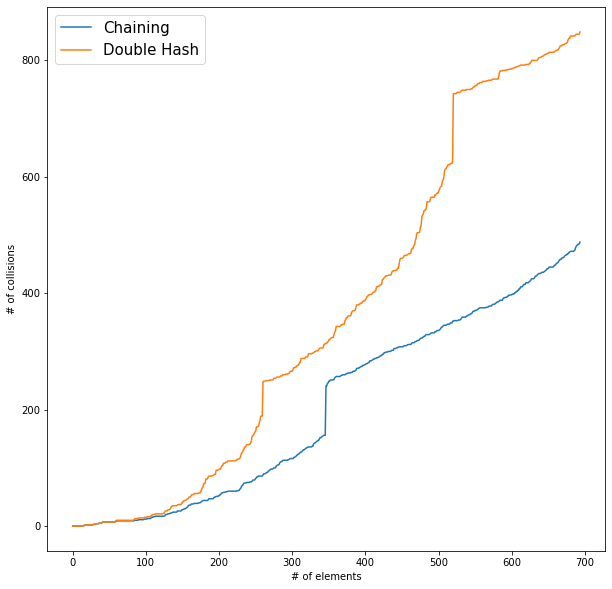

In [13]:
plot_collision()

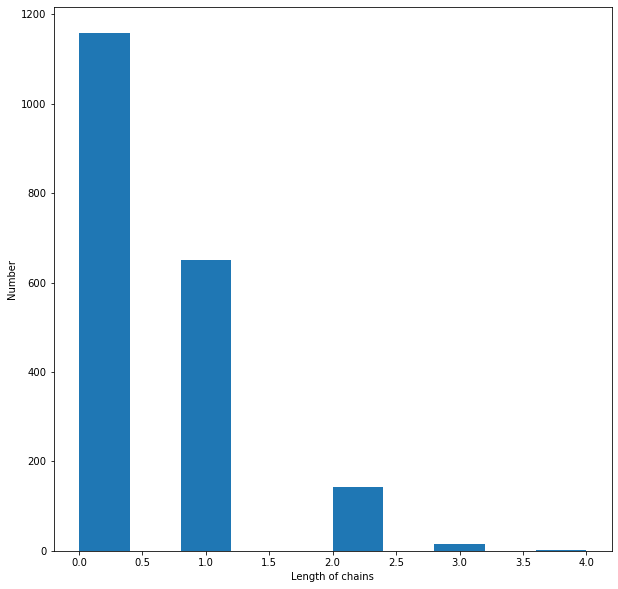

In [14]:
plot_chain_length()

### Describe and Discuss your answer

plot collision 에서는 소수 347을 선택하여 size 347에 694개의 요소를 넣는 과정에서의 collision 횟수를 plot하는 것을 구현하였다. 그래프를 보면 중간 중간 급격하게 collision이 느는것을 볼 수 있는데 이 때 resize가 일어난 것을 볼 수 있다. 또한 밑에서의 chain도 요소를 모두 넣은 뒤 각 slot의 요소의 개수를 체크하는 것으로 chain의 길이를 측정하였다. 분석해보면 모든 방식이 resize 과정에서 급격하게 collision이 느는 것을 확인할 수 있다. 그러나 chaining 방식이 double hashing방식보다 collision이 적은 것을 알 수 있다. 또한 연산량 자체가 double hashing보다 적다. hash_func2를 이용하여 그 만큼 더해나가는 연산을 계속해야 되기 때문이다. 그러나 chaining 방식은 이중리스트를 사용하여 메모리를 훨씬 많이 사용하는 것을 알 수 있다. 또한 double hashing에 비해 클러스터링에 취약하고 worst case의 경우 그냥 리스트화 되어 효율이 안좋아질 수 있다. 그리하여 chaining과 double hashing을 합쳐 기본적인 chaining에 넣어줄 때에 clustering의 기준을 세운 뒤 그 만큼 찼다면 doboule hashing을 통해 뒤로 옮기는 방법을 생각해볼 수 있다.

___